In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
%matplotlib inline
%config InlineBackend.figure_format = 'png'

from ipypb import irange
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 9.05 ms


In [3]:
df = pd.read_csv("./databases/info_synop.csv")
df

,Unnamed: 0,公司代號,公司名稱,年份,數量
0,0,1101,台泥,109,56
1,1,1101,台泥,108,60
2,2,1101,台泥,107,94
3,3,1101,台泥,106,94
4,4,1101,台泥,105,60
...,...,...,...,...,...
9465,9465,9958,世紀鋼,104,22
9466,9466,9958,世紀鋼,103,17
9467,9467,9958,世紀鋼,102,30
9468,9468,9958,世紀鋼,101,21


time: 36.9 ms


In [4]:
avg_list = df.groupby(['公司代號', '公司名稱']).mean()['數量'].tolist()
sum_list = df.groupby(['公司代號', '公司名稱']).sum()['數量'].tolist()
min_list = df.groupby(['公司代號', '公司名稱']).min()['數量'].tolist()
max_list = df.groupby(['公司代號', '公司名稱']).max()['數量'].tolist()

time: 27.8 ms


In [5]:
info_list = df.groupby(['公司代號', '公司名稱']).mean()['數量'].index.to_list()
name_list = []

for i in range(len(info_list)):
    name = info_list[i][1]
    code = info_list[i][0]
    name_list.append(str(name)+'('+str(code)+')')

time: 7.54 ms


In [6]:
pack_list = list(zip(name_list, avg_list, sum_list, max_list, min_list))

time: 734 µs


In [7]:
sdf_cols = ['名稱', 'mean', 'sum', 'max', 'min']
sdf = pd.DataFrame(data=pack_list, columns=sdf_cols)
sdf

,名稱,mean,sum,max,min
0,台泥(1101),67.3,673,94,51
1,亞泥(1102),35.7,357,54,27
2,嘉泥(1103),44.0,440,56,25
3,環泥(1104),20.6,206,36,11
4,幸福(1108),24.1,241,37,19
...,...,...,...,...,...
942,新麗(9944),26.8,268,38,20
943,潤泰新(9945),42.6,426,50,34
944,三發地產(9946),43.0,430,104,21
945,佳龍(9955),15.2,152,36,4


time: 11.7 ms


In [115]:
l10, l20, l30, l50, g50 = 0, 0, 0, 0, 0

for i in range(len(avg_list)):
    if avg_list[i] <= 10:
        l10 += 1
    elif 10 < avg_list[i] <= 20:
        l20 += 1
    elif 20 < avg_list[i] <= 30:
        l30 += 1
    elif 30 < avg_list[i] <= 50:
        l50 += 1
    else:
        g50 += 1

print(l10, l20, l30, l50, g50)

65 310 253 214 105
time: 2.08 ms


In [124]:
# Total amount of companies with at least one '0' entry
len(set(df[df['數量']==0]['公司名稱'].tolist())), round(len(set(df[df['數量']==0]['公司名稱'].tolist()))/(len(df)/10)*100, 2)

(145, 15.31)

time: 4.96 ms


In [131]:
# Types of value for the sum
len(set(sum_list))

436

time: 1.71 ms


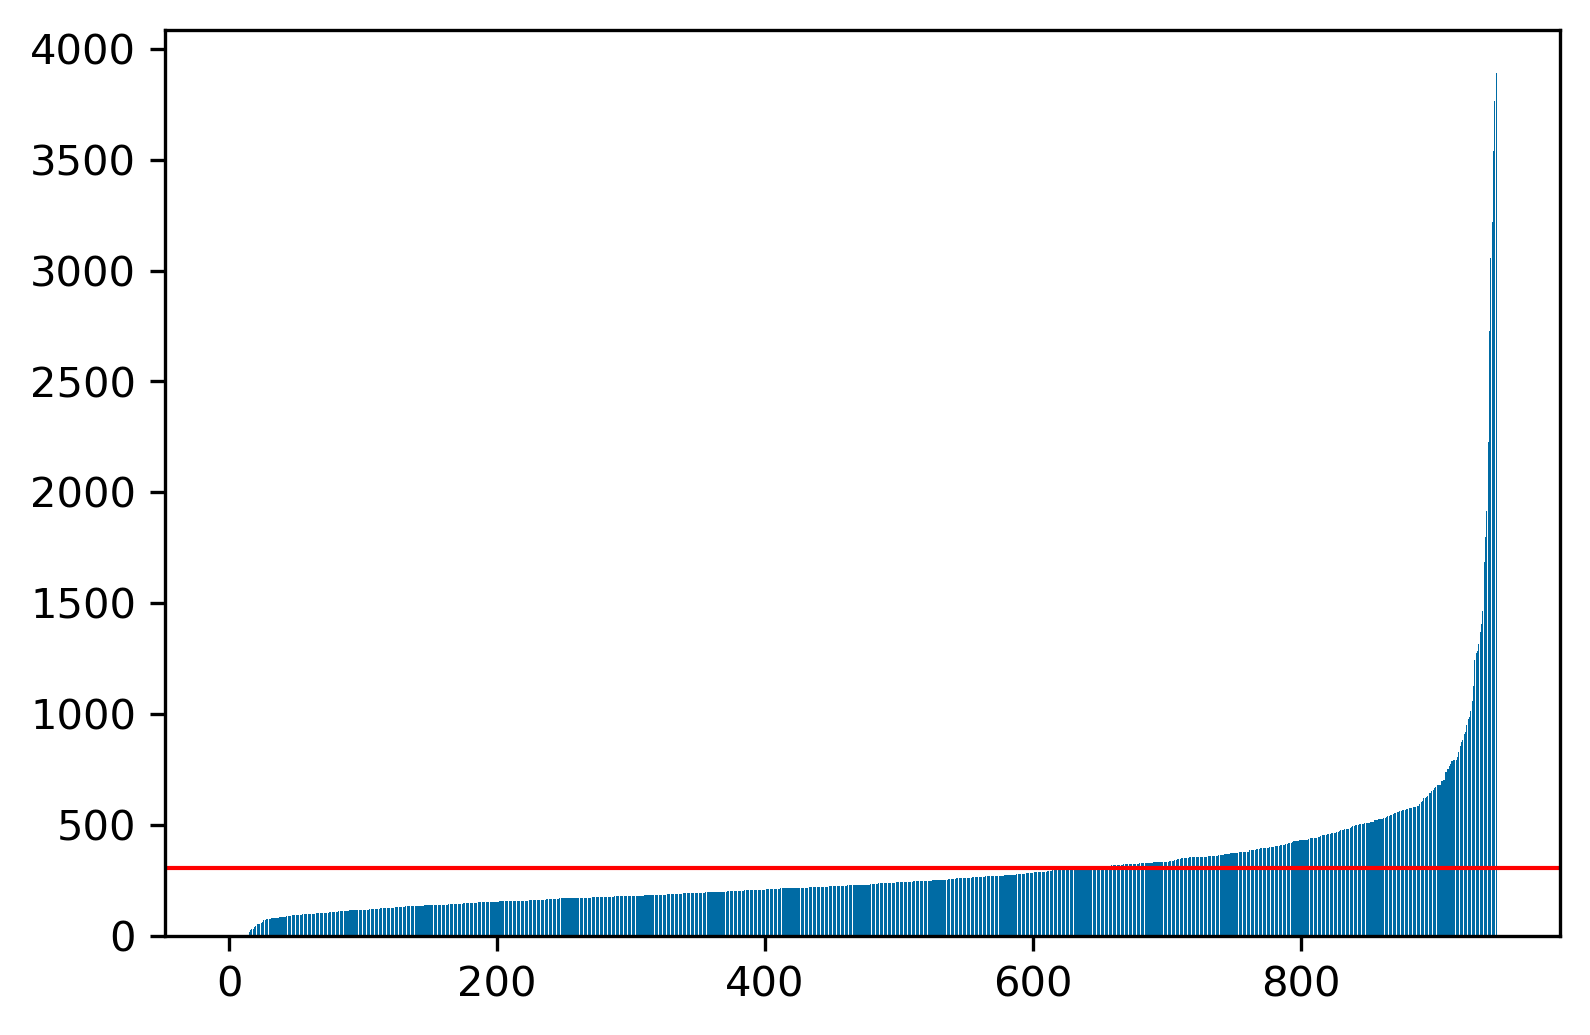

time: 1.23 s


In [17]:
stat_list = sum_list.copy()
stat_list.sort()
stat_list

# calculation of total posts
sum_tracker = 0
for i in stat_list:
    sum_tracker += i
    
sum_mean = sum_tracker/len(stat_list)
above_tracker = 0
for i in range(len(stat_list)):
    if stat_list[i] > sum_mean:
        above_tracker += 1

bar_pos = np.arange(len(stat_list))
plt.figure(dpi=300)
plt.bar(bar_pos, stat_list)
plt.axhline(y=sum_mean,linewidth=1, color='red')

In [160]:
str(round(above_tracker/len(stat_list)*100, 2))+'%'

'32.95%'

time: 1.81 ms


In [169]:
chatty_list = []
for i in range(len(sdf)):
    if sdf['sum'][i] > sum_mean:
        chatty_list.append(sdf['名稱'][i])

time: 26.8 ms


In [8]:
df['數量'].sum()

288310

time: 2.04 ms
